In [ ]:
#@title Mount Google Drive 
# Only need to be done once!
# Mount Google Drive to Colab notebook.  

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#@title External dependencies 

!pip install piexif
!pip install python-xmp-toolkit
!apt-get -qq install -y exempi              #!pip install exempi

     |████████████████████████████████| 3.6MB 4.5MB/s 
  Created wheel for python-xmp-toolkit: filename=python_xmp_toolkit-2.0.1-cp36-none-any.whl size=30712 sha256=9ee54f403ad83147c11771a3fd3cba0d66d5da092dd04b5fee3370060114bea5
  Stored in directory: /root/.cache/pip/wheels/33/de/7f/c646a5ee416c43d36deb580650d76b87dc1e5988c605def0bf
Successfully built python-xmp-toolkit
Selecting previously unselected package libexempi3:amd64.
(Reading database ... 146364 files and directories currently installed.)
Preparing to unpack .../libexempi3_2.4.5-2_amd64.deb ...
Unpacking libexempi3:amd64 (2.4.5-2) ...
Selecting previously unselected package exempi.
Preparing to unpack .../exempi_2.4.5-2_amd64.deb ...
Unpacking exempi (2.4.5-2) ...
Setting up libexempi3:amd64 (2.4.5-2) ...
Setting up exempi (2.4.5-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldn

In [ ]:
#@title Required Libraries 
#import libraries 

import os, sys
import piexif
from PIL import Image
from libxmp import XMPFiles, consts
from libxmp import XMPFiles, exempi

In [ ]:
#@title Work Directory - Change to image location on gdrive
# change working directory to Google drive 
#--------------------------------------------------

image_location = 'DJI_Mavic-filter/TristanMavImg2/20200108-m5'               # work directory with Images on gdrive
google_drive = 'gdrive/MyDrive/'

%cd /content/                                          
os.chdir(google_drive + image_location)                # Provide Folder/working driectory on google drive 

# Improve control (!) feedback check and manual input (?)
!pwd
#%ls

cwd = os.getcwd()                                      # Get the current working directory (cwd)
#files = os.listdir(os.getcwd())                       # Get all the files in that directory
#print("Files in %r: %s" % (cwd, files))               # Print directory 

/content
/content/gdrive/MyDrive/DJI_Mavic-filter/TristanMavImg2/20200108-m5


In [ ]:
!pwd
%ls

/content/gdrive/My Drive/DJI_Mavic-filter/TristanMavImg2/20200108-m5
DJI_0380.JPG  DJI_0419.JPG  DJI_0458.JPG  DJI_0497.JPG  DJI_0536.JPG
DJI_0381.JPG  DJI_0420.JPG  DJI_0459.JPG  DJI_0498.JPG  DJI_0537.JPG
DJI_0382.JPG  DJI_0421.JPG  DJI_0460.JPG  DJI_0499.JPG  DJI_0538.JPG
DJI_0383.JPG  DJI_0422.JPG  DJI_0461.JPG  DJI_0500.JPG  DJI_0539.JPG
DJI_0384.JPG  DJI_0423.JPG  DJI_0462.JPG  DJI_0501.JPG  DJI_0540.JPG
DJI_0385.JPG  DJI_0424.JPG  DJI_0463.JPG  DJI_0502.JPG  DJI_0541.JPG
DJI_0386.JPG  DJI_0425.JPG  DJI_0464.JPG  DJI_0503.JPG  DJI_0542.JPG
DJI_0387.JPG  DJI_0426.JPG  DJI_0465.JPG  DJI_0504.JPG  DJI_0543.JPG
DJI_0388.JPG  DJI_0427.JPG  DJI_0466.JPG  DJI_0505.JPG  DJI_0544.JPG
DJI_0389.JPG  DJI_0428.JPG  DJI_0467.JPG  DJI_0506.JPG  DJI_0545.JPG
DJI_0390.JPG  DJI_0429.JPG  DJI_0468.JPG  DJI_0507.JPG  DJI_0546.JPG
DJI_0391.JPG  DJI_0430.JPG  DJI_0469.JPG  DJI_0508.JPG  DJI_0547.JPG
DJI_0392.JPG  DJI_0431.JPG  DJI_0470.JPG  DJI_0509.JPG  DJI_0548.JPG
DJI_0393.JPG  DJI_0432.JPG  DJI_04

**Header: Gimbball**

*   read role 
*   manipulate/edit role 

Caution: 
There are two different types of rotations in the XMP header: 'Gimbbal' and 'Flight' 
*   Flight rotations (role, yaw and pitch) describe the atitude of the drone i.e. flight model 
*   Gimbbal rotations (pitch, yaw and role) register the orientation of the camera in respect to flight model 

The following page shows detaile descriptions:
https://developer.dji.com/mobile-sdk/documentation/introduction/flightController_concepts.html

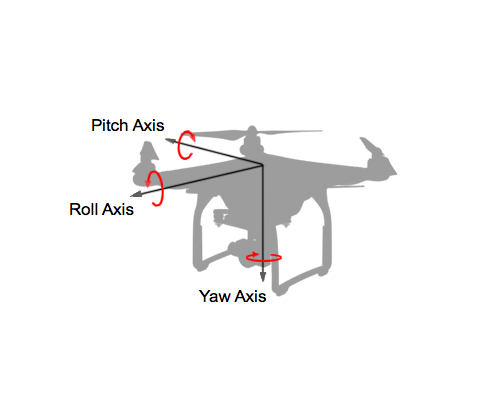


1.   The Gimbal role rotation is pysically restricted to a few degree. However many imagesheaders incude false readings which can easily detected and corrected. 








In [ ]:
# Read XMP Meta Information: Gimball Roll)
# pass image file with Meta data header (jpg format) 
# returns Roll angle in Degree (as float)
#--------------------------------------------------

def Read_GimbalRoll (Imgfile):
    xmpfile = XMPFiles(file_path=Imgfile, open_forupdate=False)
    xmp = xmpfile.get_xmp()                                 # Retrive XMP header 
    
    DJIname = (xmp.get_namespace_for_prefix('drone-dji'))   # Retrive name space
    Roll = float(xmp.get_property(DJIname, 'GimbalRollDegree'))
    xmpfile.close_file()
    return (Roll)


In [ ]:
# Write XMP: Gimball Roll
# pass Image file and new Roll angle
# return feedback (final roll for control)
#--------------------------------------------------

def Write_GimbalRoll (imgfile,roll_new):
    xmpfile = XMPFiles(file_path=imgfile, open_forupdate=True)
    xmp = xmpfile.get_xmp()                                 # Retrive XMP header    
    #print(xmpfile.can_put_xmp(xmp))                        # feedback - Check file status
    
    DJIname = (xmp.get_namespace_for_prefix('drone-dji'))   # Retrive namespace
    roll_old = xmp.get_property(DJIname, 'GimbalRollDegree')
    xmp.set_property(DJIname, 'GimbalRollDegree', roll_new)        
    roll = float(xmp.get_property(DJIname, 'GimbalRollDegree'))

    print ('Gimbal Roll before: ' + str(roll_old) + 'Gimball corrected: ' + str(roll))     #single line feedback (comment out)

    xmpfile.put_xmp(xmp)                                    # safe properties
    xmpfile.close_file()                                    # close file 
    return (roll)


**Header: (GPS/GNSS) Altitude**

*   read Absolute Altitude
*   read Relative Altitude 
*   edit/update (new) abs. Altitude 
*   eidt/update (new) relative Altitude 

Wrong or inaccurate registered altittudes are a common problem with most DJI drones without precises GNSS - RTK PPK support. The wrongly registered altitude relates to` XMP drone-dji absolute altitude  `. It his highly advisable to check and correct this heights (Reference DJBackes publication/thesis xyz) 

In this respect it is important to consider and implement the appropraite vertical datum (e.g. ellipoidal - WGS84 or orthmetric based on EGM96).

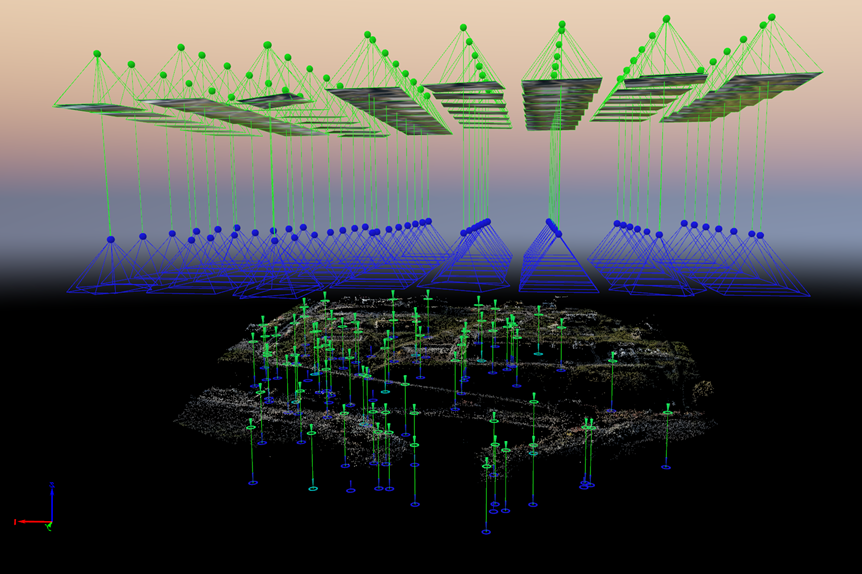

In [ ]:
# Read XMP information - Absolute Altitude 
# pass image file with Meta data header (jpg format) 
# returns absolute altidtude (in m as float)

def Read_AbsAltitude (Imgfile):
    xmpfile = XMPFiles(file_path=Imgfile, open_forupdate=False)
    xmp = xmpfile.get_xmp()                                 # Retrive XMP header 
    
    DJIname = (xmp.get_namespace_for_prefix('drone-dji'))   # Retrive name space
    AbsAlt = float(xmp.get_property(DJIname, 'AbsoluteAltitude'))
    xmpfile.close_file()
    return (AbsAlt)
    

In [ ]:
# Read XMP information - Relative Altitude 
# pass image file with Meta data header (jpg format) 
# returns relative altidtude (in m as float)

def Read_RelAltitude (Imgfile):
    xmpfile = XMPFiles(file_path=Imgfile, open_forupdate=False)
    xmp = xmpfile.get_xmp()                                 # Retrive XMP header 
    
    DJIname = (xmp.get_namespace_for_prefix('drone-dji'))   # Retrive name space
    RelAlt = float(xmp.get_property(DJIname, 'RelativeAltitude'))
    xmpfile.close_file()
    return (RelAlt)


In [ ]:
# Read XMP information - Exif:GPS Altitude 
# pass image file as (jpg) 
# returns absolute altidtude in m (float)

def Read_GPSAltitude (Imgfile):
    xmpfile = XMPFiles(file_path=Imgfile, open_forupdate=False)
    xmp = xmpfile.get_xmp()                                  # Retrive XMP header 

    exifname = xmp.get_namespace_for_prefix('exif')          # Retrive name space
    Altitude =  (xmp.get_property(exifname, 'GPSAltitude'))

    AltitudeList=Altitude.split("/")                         # Transform str to float
    GPSAlt=float(AltitudeList[0])/float(AltitudeList[1])
    
    xmpfile.close_file()
    return (GPSAlt)


In [ ]:
# Write XMP Absolute Altitude
# pass Image file and new Absolute Altitude (as string)
# Absolute height in m over reference datum, initial value in the image header often shows large differences)
# returns feedback (final altitude as float)

def Write_AbsAltitude (Imgfile,altitude_new):
    xmpfile = XMPFiles(file_path=Imgfile, open_forupdate=True)
    xmp = xmpfile.get_xmp()                                 # Retrive XMP header    
    #print(xmpfile.can_put_xmp(xmp))                        # feedback - Check file status
    
    DJIname = (xmp.get_namespace_for_prefix('drone-dji'))   # Retrive namespace
    #print ('Absolute Altitude old: ' + str(xmp.get_property(DJIname, 'AbsoluteAltitude')))
    xmp.set_property(DJIname, 'AbsoluteAltitude', altitude_new)         # (in meter, orthometric heights)
    altitude = float(xmp.get_property(DJIname, 'AbsoluteAltitude'))

    xmpfile.put_xmp(xmp)                                    # safe properties
    xmpfile.close_file()                                    # close file 
    return (altitude)


In [ ]:
# Write XMP Relative Altitude
# pass Image file and new Relative Altitude (as string)
# Relative altitude is weakly defined, it can assumed that this is the height over take off point measured barometrically (Check Reference)
# returns feedback (final altitude as float)

def Write_RelAltitude (Imgfile,altitude_new):
    xmpfile = XMPFiles(file_path=Imgfile, open_forupdate=True)
    xmp = xmpfile.get_xmp()                                 # Retrive XMP header    
    #print(xmpfile.can_put_xmp(xmp))                        # feedback - Check file status
    
    DJIname = (xmp.get_namespace_for_prefix('drone-dji'))   # Retrive namespace
    #print ('Absolute Altitude old: ' + str(xmp.get_property(DJIname, 'AbsoluteAltitude')))
    xmp.set_property(DJIname, 'AbsoluteAltitude', altitude_new)         # (in meter, orthometric heights)
    altitude = float(xmp.get_property(DJIname, 'AbsoluteAltitude'))

    xmpfile.put_xmp(xmp)                                    # safe properties
    xmpfile.close_file()                                    # close file 
    return (altitude)
    

In [ ]:
# Write XMP GPS Altitude
# pass Image file and new GPS-Altitude (as float)
# returns feedback 

def Write_GPSAltitude (Imgfile,altitude_new):
    xmpfile = XMPFiles(file_path=Imgfile, open_forupdate=True)
    xmp = xmpfile.get_xmp()                                  # Retrive XMP header    
    #print(xmpfile.can_put_xmp(xmp))                         # feedback - Check file status
    
    exifname = (xmp.get_namespace_for_prefix('exif'))        # Retrive name space
    
    #Altitude =  (xmp.get_property(exifname, 'GPSAltitude'))  # Read existing Altitude
    #AltitudeList=Altitude.split("/")                         # Transform str to float
    #GPSAlt=float(AltitudeList[0])/float(AltitudeList[1])
    #print ('GPS Altitude (exif) old: ' + str(GPSAlt))        # feedback (comment out)
    
    Altitude = str(int(altitude_new*1000))+('/1000')         # GPS altitude -> Exif entry 
    xmp.set_property(exifname, 'GPSAltitude', Altitude)      # as string [x/1000]
    
    Altitude = (xmp.get_property(exifname, 'GPSAltitude'))
    AltitudeList=Altitude.split("/")
    altitude=float(AltitudeList[0])/float(AltitudeList[1])

    xmpfile.put_xmp(xmp)                                    # safe properties
    xmpfile.close_file()                                    # close file 
    return (altitude)


**Main: Image file Meta header check and correct**

1.   Gimbal Role error 
2.   Absloute height correction (absolute altitude)


**Main: Gimbal Role error**


In [ ]:
# Main - Filter for false Roll readings
# For all image files, read exif/xmp header 
#--------------------------------------------------


# Essentials 
cwd = os.getcwd()                   # work directory


# Gimball roll; detect and correct
#=================================
MaxRoll_Blunder = 20                # Threshold for flase reading  (chose a small an gle for a standard mapping flight configuration with Nadir pointing camera; Roll/Omega and Pitch/Phi angles are small)
i = 0                               # counter
j = 0 

logfile = open("log-roll.txt","w")  # Logfile


with os.scandir(cwd) as entries:    # read directory 

    for entry in entries:
        
        #catch none image files or subdirectories to avoid errors (?!?)
        try: 
          roll = Read_GimbalRoll(entry.name)
        
          if roll <= MaxRoll_Blunder and roll >= (MaxRoll_Blunder*-1):
            newroll = roll
            j += 1 
          elif roll > MaxRoll_Blunder:
            newroll = roll - 180
            Write_GimbalRoll(entry.name,str(newroll))
            logfile.write(entry.name+ ' before: '+ str(roll) +' corrected:' + str(newroll) + '\n')
            i += 1
            j += 1
          elif roll < (MaxRoll_Blunder*-1):
            newroll = roll + 180
            Write_GimbalRoll(entry.name,str(newroll))
            logfile.write(entry.name+ ' before: '+ str(roll) +' corrected:' + str(newroll) + '\n')
            i += 1
            j += 1
          print(entry.name + ' ' + str(newroll))
          logfile.write(entry.name+ ' ' + str(newroll) + '\n')
        
        except:
          print(entry.name+ ' is not an DJI image or has no header. ') 

    print (str(i)+ ' Rotations corrected')
    logfile.write(str(j) + ' Image files; ' + str(i)+ ' Rotations corrected \n')

print ('***End of Gimbal role Check***') 


logfile.close() 

DJI_0381.JPG 0.0
DJI_0380.JPG 0.0
DJI_0389.JPG 0.0
DJI_0388.JPG 0.0
DJI_0387.JPG 0.0
DJI_0386.JPG 0.0
DJI_0385.JPG 0.0
DJI_0384.JPG 0.0
DJI_0383.JPG 0.0
DJI_0382.JPG 0.0
DJI_0396.JPG 0.0
DJI_0395.JPG 0.0
Gimbal Roll before: -179.90Gimball corrected: 0.09999999999999432
DJI_0394.JPG 0.09999999999999432
DJI_0393.JPG 0.0
DJI_0392.JPG 0.0
Gimbal Roll before: -179.90Gimball corrected: 0.09999999999999432
DJI_0391.JPG 0.09999999999999432
DJI_0390.JPG 0.0
DJI_0404.JPG 0.0
DJI_0403.JPG 0.0
DJI_0402.JPG 0.0
DJI_0401.JPG 0.0
DJI_0400.JPG 0.0
DJI_0399.JPG 0.0
DJI_0398.JPG 0.0
DJI_0397.JPG 0.0
Gimbal Roll before: -179.90Gimball corrected: 0.09999999999999432
DJI_0412.JPG 0.09999999999999432
DJI_0411.JPG 0.0
Gimbal Roll before: -179.90Gimball corrected: 0.09999999999999432
DJI_0410.JPG 0.09999999999999432
DJI_0409.JPG 0.0
DJI_0408.JPG 0.0
DJI_0407.JPG 0.0
DJI_0406.JPG 0.0
DJI_0405.JPG 0.0
DJI_0420.JPG 0.0
DJI_0419.JPG 0.0
DJI_0418.JPG 0.0
DJI_0417.JPG 0.0
DJI_0416.JPG 0.0
DJI_0415.JPG 0.0
DJI_0414.

In [ ]:
# feedback 
#--------------------------------------------------

# report file 
logfile = open("check-roll.txt","w") 


print (' Feedback Check') 
i = 0

with os.scandir(cwd) as entries:    #read directory 
    for entry in entries:
      try: 
        roll = Read_GimbalRoll(entry.name)
        if roll != 0:
          print(entry.name + ' ' + str(roll))
          logfile.write(entry.name + ' ' + str(roll)+'\n')
        i += 1
      except:
        print(entry.name+ ' is not an DJI image or has no header. ') 
    
    print (str(i) + " Files checked")
    logfile.write(str(i)+' Files checked')


logfile.close() 

 Feedback Check
DJI_0394.JPG 0.09999999999999432
DJI_0391.JPG 0.09999999999999432
DJI_0412.JPG 0.09999999999999432
DJI_0410.JPG 0.09999999999999432
DJI_0413.JPG 0.09999999999999432
DJI_0453.JPG 0.09999999999999432
DJI_0450.JPG 0.09999999999999432
DJI_0475.JPG 0.09999999999999432
DJI_0512.JPG 0.09999999999999432
DJI_0508.JPG 0.09999999999999432
DJI_0507.JPG 0.09999999999999432
DJI_0518.JPG 0.09999999999999432
DJI_0513.JPG 0.09999999999999432
DJI_0520.JPG 0.09999999999999432
DJI_0530.JPG 0.09999999999999432
DJI_0528.JPG 0.09999999999999432
DJI_0564.JPG 0.09999999999999432
log-roll.txt is not an DJI image or has no header. 
check-roll.txt is not an DJI image or has no header. 
194 Files checked


**Main: Absloute height correction (absolute altitude)**



In [ ]:
# Main - Absolute Height check and correct
# For all image files, read exif/xmp header 
#--------------------------------------------------

# Essential var
cwd = os.getcwd()                   # work directory
i = 0                               # counter 

# vertical reference Datum 
# Define vertical Datum: e.g. WGS84 (ellipsoidal heights), EGM96 (Geoid height), local height Datum
# Geoid height calculator: https://www.unavco.org/software/geodetic-utilities/geoid-height-calculator/geoid-height-calculator.html
# The Geoid height estimated from a central point of the AOI is sufficiant for projects of a limited extent
GeoidH = 0                          # Distance between Ellipsoid and Geoid

# Absolute Height correction: 
DeltaH = 53.4                     # height difference:  heinformat. 
AbsAltitude = float(0)            # init absolute altitude
GPSAltitude = float(0)            # init GPS altitude 
NewAbsAltitude = 0                # init corrected Abs altitude 
NewGPSAltitude = 0                # init corrected GPS altitude

# report file 
logfile = open("log-altitude.txt","w") 

logfile.write('Correction of Altitude (DeltaH): ' + str(DeltaH) + '\n')
logfile.write('Geoid Height: ' + str(GeoidH) + '\n')


with os.scandir(cwd) as entries:    # read directory 

    for entry in entries:
        
        #catch none image files or subdirectories to avoid failure (?!?)
        try: 
          AbsAltitude = Read_AbsAltitude(entry.name)  
          GPSAltitude = Read_GPSAltitude(entry.name)

          # Calc corrected Altitude  
          NewAbsAltitude = AbsAltitude + DeltaH
          NewGPSAltitude = GPSAltitude + DeltaH
          
          # Option: correction for Geoid     
          NewAbsAltitude = NewAbsAltitude + GeoidH    #check the sign

          # edit Altitude 
          NewAbsAltitude = Write_AbsAltitude(entry.name,str(NewAbsAltitude))
          NewGPSAltitude = Write_GPSAltitude(entry.name,NewGPSAltitude)

          #feedback
          print(entry.name + ' old Abs: ' + str(AbsAltitude) + ' new Abs: ' + str(NewAbsAltitude) + ' new GPS: ' + str(NewGPSAltitude))    #feedbback 
          logfile.write(entry.name + ' AbsAltitude old:' + str(AbsAltitude) + ' new:' + str(NewAbsAltitude) + ' GPS:' + str(NewGPSAltitude) + '\n')
          i += 1

        except:
          print(entry.name+ ' is not an DJI image or has no header. ')

    print ('Number of images corrected '+ str(i))
    logfile.write('Number of images corrected '+ str(i)+'\n')

logfile.close() 


DJI_0381.JPG old Abs: 93.89 new Abs: 147.29 new GPS: 147.288
DJI_0380.JPG old Abs: 93.89 new Abs: 147.29 new GPS: 147.288
DJI_0389.JPG old Abs: 94.09 new Abs: 147.49 new GPS: 147.488
DJI_0388.JPG old Abs: 94.09 new Abs: 147.49 new GPS: 147.488
DJI_0387.JPG old Abs: 94.09 new Abs: 147.49 new GPS: 147.488
DJI_0386.JPG old Abs: 93.99 new Abs: 147.39 new GPS: 147.388
DJI_0385.JPG old Abs: 93.99 new Abs: 147.39 new GPS: 147.388
DJI_0384.JPG old Abs: 93.99 new Abs: 147.39 new GPS: 147.388
DJI_0383.JPG old Abs: 93.99 new Abs: 147.39 new GPS: 147.388
DJI_0382.JPG old Abs: 93.99 new Abs: 147.39 new GPS: 147.388
DJI_0396.JPG old Abs: 94.19 new Abs: 147.59 new GPS: 147.588
DJI_0395.JPG old Abs: 94.19 new Abs: 147.59 new GPS: 147.588
DJI_0394.JPG old Abs: 94.19 new Abs: 147.59 new GPS: 147.588
DJI_0393.JPG old Abs: 94.19 new Abs: 147.59 new GPS: 147.588
DJI_0392.JPG old Abs: 94.19 new Abs: 147.59 new GPS: 147.588
DJI_0391.JPG old Abs: 94.19 new Abs: 147.59 new GPS: 147.588
DJI_0390.JPG old Abs: 94

In [ ]:
# feedback 
#--------------------------------------------------

# report file 
logfile = open("check-altitude.txt","w") 


print (' Feedback Check') 
i = 0

with os.scandir(cwd) as entries:    #read directory 
    for entry in entries:
      try: 
        altitude = Read_AbsAltitude(entry.name)
        
        print(entry.name + ' ' + str(altitude))
        logfile.write(entry.name + ' ' + str(altitude)+'\n')
        i += 1
      except:
        print(entry.name+ ' is not an DJI image or has no header. ') 
    
    print (str(i) + " Files checked")
    logfile.write(str(i)+' Files checked')


logfile.close() 

 Feedback Check
DJI_0381.JPG 147.29
DJI_0380.JPG 147.29
DJI_0389.JPG 147.49
DJI_0388.JPG 147.49
DJI_0387.JPG 147.49
DJI_0386.JPG 147.39
DJI_0385.JPG 147.39
DJI_0384.JPG 147.39
DJI_0383.JPG 147.39
DJI_0382.JPG 147.39
DJI_0396.JPG 147.59
DJI_0395.JPG 147.59
DJI_0394.JPG 147.59
DJI_0393.JPG 147.59
DJI_0392.JPG 147.59
DJI_0391.JPG 147.59
DJI_0390.JPG 147.49
DJI_0404.JPG 147.59
DJI_0403.JPG 147.59
DJI_0402.JPG 147.49
DJI_0401.JPG 147.49
DJI_0400.JPG 147.59
DJI_0399.JPG 147.59
DJI_0398.JPG 147.59
DJI_0397.JPG 147.49
DJI_0412.JPG 147.59
DJI_0411.JPG 147.59
DJI_0410.JPG 147.49
DJI_0409.JPG 147.49
DJI_0408.JPG 147.49
DJI_0407.JPG 147.59
DJI_0406.JPG 147.49
DJI_0405.JPG 147.59
DJI_0420.JPG 147.69
DJI_0419.JPG 147.59
DJI_0418.JPG 147.59
DJI_0417.JPG 147.39
DJI_0416.JPG 147.49
DJI_0415.JPG 147.49
DJI_0414.JPG 147.59
DJI_0413.JPG 147.49
DJI_0426.JPG 147.49
DJI_0425.JPG 147.59
DJI_0424.JPG 147.59
DJI_0423.JPG 147.69
DJI_0422.JPG 147.59
DJI_0421.JPG 147.59
DJI_0434.JPG 147.59
DJI_0433.JPG 147.59
DJI_